# What sets have the rarest pieces in them?

In [1]:
# draw graph to show this result: What sets have the rarest pieces in them?

# store set name and part picture links 

# use google to search part names, get links google have
# open some link and get the url of picture 
# https://www.geeksforgeeks.org/performing-google-search-using-python-code/

# draw the graph which can interactive with customer 
# https://blog.modeanalytics.com/python-interactive-plot-libraries/

In [2]:
import pandas as pd
import numpy as np

In [3]:
# read data 
setsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/Lego/q3.csv'
df = pd.read_csv(setsfile)

In [4]:
df.head()

,Unnamed: 0,name_set,part_num,name,freq
0,607,Large Wheels and Axles,2536,"Plant Tree Palm Trunk - Short Connector, no Ax...",1
1,609,Large Wheels and Axles,2711,"Technic Plate 1 x 5 with Toothed Ends, 2 Studs...",1
2,610,Large Wheels and Axles,2717,Technic Seat [3 x 2 Base],1
3,614,Large Wheels and Axles,2952,Propeller 2 Blade 9 Diameter,1
4,628,Large Wheels and Axles,3650c,Technic Gear 24 Tooth Crown with Reinforcement...,1


In [5]:
# delete columns:  Unnamed:0 and freq 
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('freq', axis=1)
df = df.drop('part_num',axis =1)
df.head()

,name_set,name
0,Large Wheels and Axles,"Plant Tree Palm Trunk - Short Connector, no Ax..."
1,Large Wheels and Axles,"Technic Plate 1 x 5 with Toothed Ends, 2 Studs..."
2,Large Wheels and Axles,Technic Seat [3 x 2 Base]
3,Large Wheels and Axles,Propeller 2 Blade 9 Diameter
4,Large Wheels and Axles,Technic Gear 24 Tooth Crown with Reinforcement...


In [6]:
len(df['name_set'].unique())

21

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.freq = df['name_set'].value_counts()
df.freq = df.freq.to_frame()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [9]:
type(df.freq)

pandas.core.frame.DataFrame

In [10]:
df.freq = df.freq.reset_index()
df.freq =df.freq.rename(columns = {'index':'setname'})
df.freq =df.freq.rename(columns = {'name_set':'freq'})
df.freq.head()

,setname,freq
0,Harbor Sentry,44
1,Mini Construction,36
2,Spyrius Fold-Wing Spacecraft,22
3,Aqua Res-Q Transport,18
4,Enchanted Island,16


In [11]:
import seaborn as sns

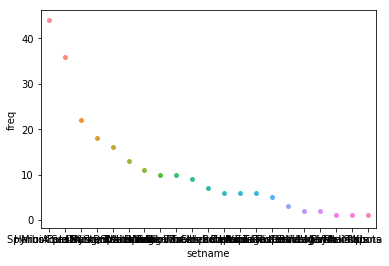

In [12]:
graph = sns.stripplot(x="setname", y="freq", data=df.freq);

In [13]:
setname = df.freq.setname.tolist()
freq = df.freq.freq.tolist()
print(setname)
print(freq)

['Harbor Sentry', 'Mini Construction', 'Spyrius Fold-Wing Spacecraft', 'Aqua Res-Q Transport', 'Enchanted Island', 'Police Car', 'Meteor Monitor', 'Mining Truck', 'Dirt Bike Transporter', 'Large Wheels and Axles', 'DK Star Wars Brickmaster: Battle For The Stolen Crystals', 'Clone Turbo Tank', 'Helicopter Transport', 'Vintage Car', 'Rapid River Village', "Captain Redbeard's Pirate Ship", 'Delivery Van', 'Package Pick-Up', 'Mini Animals', 'Mini Robots', 'Krana']
[44, 36, 22, 18, 16, 13, 11, 10, 10, 9, 7, 6, 6, 6, 5, 3, 2, 2, 1, 1, 1]


In [14]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure


from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

In [15]:
a = setname
b = freq
# covert df to a dictionary
c = dict()
c = {idx: group['name'].tolist() 
        for idx, group in df.groupby('name_set')}
type(c)

sort = sorted(c, key=lambda k: len(c[k]),reverse = True)
#print(sort)

#print(c)
value = list()
for key in sort:
    value.append(c.get(key))
#print(value)

In [16]:
#output_file("colormapped_bars.html")

fruits = setname
counts = freq
name = value

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, names = name, color=Spectral6))

hover = HoverTool(tooltips=[
    ("partName", "@names"),
    ("count", "@counts")
])

p = figure(x_range=fruits, y_range=(0,50), plot_height=500, tools=[hover], title="Fruit Counts",
           toolbar_location=None)

p.vbar(x='fruits', top='counts', width=0.9, color='color',legend=None, source=source)

p.xaxis.major_label_orientation = "vertical"
p.xgrid.grid_line_color = None

#p.legend.orientation = "horizontal"
#p.legend.location = "top_right"
#p.legend.orientation = "vertical"

#new_legend = p.legend[0]
#p.legend[0].plot = None
#p.add_layout(new_legend, 'right')



/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('color', 6), ('counts', 21), ('fruits', 21), ('names', 21)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [17]:
show(p)